In [2]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [4]:
# Build the Sequential feedforward neural network model

model  = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(16, activation='relu',name='laye_1'),
    Dense(16, activation='relu'),
    Dense(10),
    Softmax()
    
])

In [5]:
# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
laye_1 (Dense)               (None, 16)                12560     
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                170       
_________________________________________________________________
softmax (Softmax)            (None, 10)                0         
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [7]:
# Build the Sequential convolutional neural network model

model = Sequential([
    Conv2D(16, kernel_size =3, padding='same',activation='relu', strides=1,input_shape=(1, 28,28), data_format='channels_first'),
    MaxPooling2D(pool_size=3, data_format='channels_first'),
    Flatten(),
    Dense(10, activation='softmax')
])

In [8]:
# Print the model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 16, 28, 28)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 9, 9)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1296)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                12970     
Total params: 13,130
Trainable params: 13,130
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [9]:
# Define the model optimizer, loss function and metrics

opt  = tf.keras.optimizers.Adam(learning_rate=0.005)
acc  = tf.keras.metrics.SparseCategoricalAccuracy()
mae  = tf.keras.metrics.MeanAbsoluteError()
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=[acc, mae]
             )


In [10]:
# Print the resulting model attributes
print(model.loss)
print(model.optimizer)
print(model.metrics)
print(model.optimizer.lr)


sparse_categorical_crossentropy
[<tensorflow.python.keras.metrics.SparseCategoricalAccuracy object at 0x7fc7246a67b8>, <tensorflow.python.keras.metrics.MeanAbsoluteError object at 0x7fc7246a69e8>]
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.005>


***
<a id="coding_tutorial_4"></a>
## The fit method

In [11]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [12]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [13]:
# Print the shape of the training data

train_images.shape

(60000, 28, 28)

In [14]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

In [15]:
train_labels[0]

9

In [16]:
# Rescale the image values so that they lie in between 0 and 1.

train_images = train_images / 255.
test_images = test_images / 255.

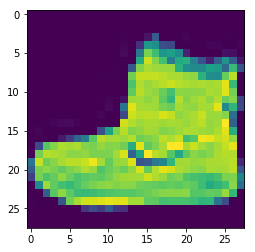

label: Ankle boot


In [17]:
# Display one of the images
i = 0
img = train_images[i]
plt.imshow(img)
plt.show()
print(f"label: {labels[train_labels[i]]}")

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D,Dense,Flatten

In [19]:
# create model
model = Sequential([
    Conv2D(16, (3,3), input_shape=(28, 28, 1), activation="relu"),
    MaxPool2D((3,3)),
    Flatten(),
    Dense(10, activation="softmax")
])

In [20]:
# complie model
opt  = tf.keras.optimizers.Adam(learning_rate=0.005)
acc  = tf.keras.metrics.SparseCategoricalAccuracy()
mae  = tf.keras.metrics.MeanAbsoluteError()
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=[acc, mae]
             )


#### Fit the model

In [21]:
# Fit the model

history = model.fit(train_images[...,np.newaxis], train_labels, epochs=8, batch_size=256, verbose=2)

Train on 60000 samples
Epoch 1/8
60000/60000 - 51s - loss: 0.5594 - sparse_categorical_accuracy: 0.8040 - mean_absolute_error: 4.4200
Epoch 2/8
60000/60000 - 47s - loss: 0.3739 - sparse_categorical_accuracy: 0.8685 - mean_absolute_error: 4.4200
Epoch 3/8
60000/60000 - 47s - loss: 0.3384 - sparse_categorical_accuracy: 0.8786 - mean_absolute_error: 4.4200
Epoch 4/8
60000/60000 - 47s - loss: 0.3194 - sparse_categorical_accuracy: 0.8857 - mean_absolute_error: 4.4200
Epoch 5/8
60000/60000 - 49s - loss: 0.3095 - sparse_categorical_accuracy: 0.8897 - mean_absolute_error: 4.4200
Epoch 6/8
60000/60000 - 49s - loss: 0.2979 - sparse_categorical_accuracy: 0.8934 - mean_absolute_error: 4.4200
Epoch 7/8
60000/60000 - 48s - loss: 0.2911 - sparse_categorical_accuracy: 0.8948 - mean_absolute_error: 4.4200
Epoch 8/8
60000/60000 - 47s - loss: 0.2849 - sparse_categorical_accuracy: 0.8965 - mean_absolute_error: 4.4200


#### Plot training history

In [22]:
# Load the history into a pandas Dataframe

df = pd.DataFrame(history.history)
df.head()

,loss,sparse_categorical_accuracy,mean_absolute_error
0,0.559365,0.803950,4.420001
1,0.373888,0.868517,4.420000
2,0.338415,0.878583,4.420001
3,0.319399,0.885717,4.419998
4,0.309510,0.889717,4.420000


[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

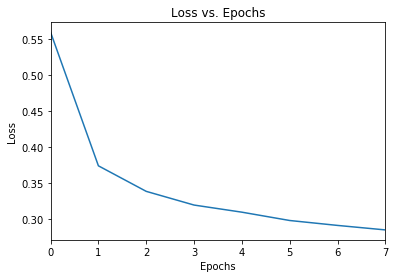

In [23]:
# Make a plot for the loss

loss_plot = df.plot(y="loss", title= "Loss vs. Epochs", legend=False)
loss_plot.set(xlabel="Epochs", ylabel="Loss")

In [27]:
df = pd.DataFrame(history.history)
df

,loss,sparse_categorical_accuracy,mean_absolute_error
0,0.559365,0.803950,4.420001
1,0.373888,0.868517,4.420000
2,0.338415,0.878583,4.420001
3,0.319399,0.885717,4.419998
4,0.309510,0.889717,4.420000
5,0.297950,0.893433,4.420000
6,0.291126,0.894767,4.420002
7,0.284878,0.896483,4.420000


[Text(0, 0.5, 'Acc'), Text(0.5, 0, 'Epochs')]

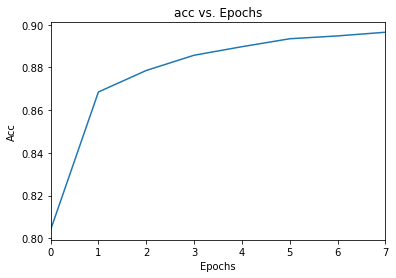

In [30]:
# Make a plot for the accuracy
acc_plot = df.plot(y="sparse_categorical_accuracy", title="acc vs. Epochs",legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Acc")

[Text(0, 0.5, 'mae'), Text(0.5, 0, 'Epochs')]

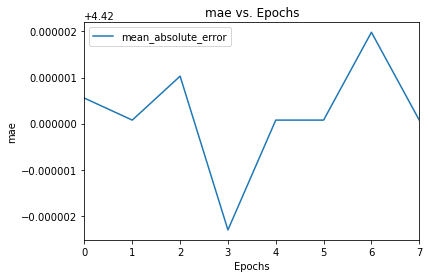

In [32]:
# Make a plot for the additional metric
mae_plot = df.plot(y="mean_absolute_error", title="mae vs. Epochs")
mae_plot.set(xlabel="Epochs", ylabel="mae")

***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [33]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [37]:
# Evaluate the model

model.evaluate(test_images[...,np.newaxis], test_labels, verbose=2)

10000/1 - 5s - loss: 0.2982 - sparse_categorical_accuracy: 0.8825 - mean_absolute_error: 4.4200


[0.33316260046958923, 0.8825, 4.419997]

#### Make predictions from the model

8858


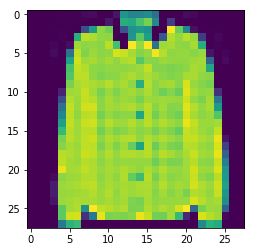

Label: Coat


In [59]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])
print(random_inx)
test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [60]:
# Get the model predictions

prediction = model.predict(test_image[np.newaxis,...,np.newaxis])
print(f"Prediction Label: {labels[np.argmax(prediction)]}")

Prediction Label: Coat
